<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-12/Tugas_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
## Mendeteksi orientasi teks dan jenis skrip

### Persiapan Gambar

In [1]:
# install pytesseract
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 9 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [11]:
# Import Library
import re
import cv2 as cv
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
import imutils
from google.colab.patches import cv2_imshow as show

In [3]:
# Path image source
pathImg = 'drive/MyDrive/Kuliah/ML/week-12-OCR/hitchhikers-rotated.png'

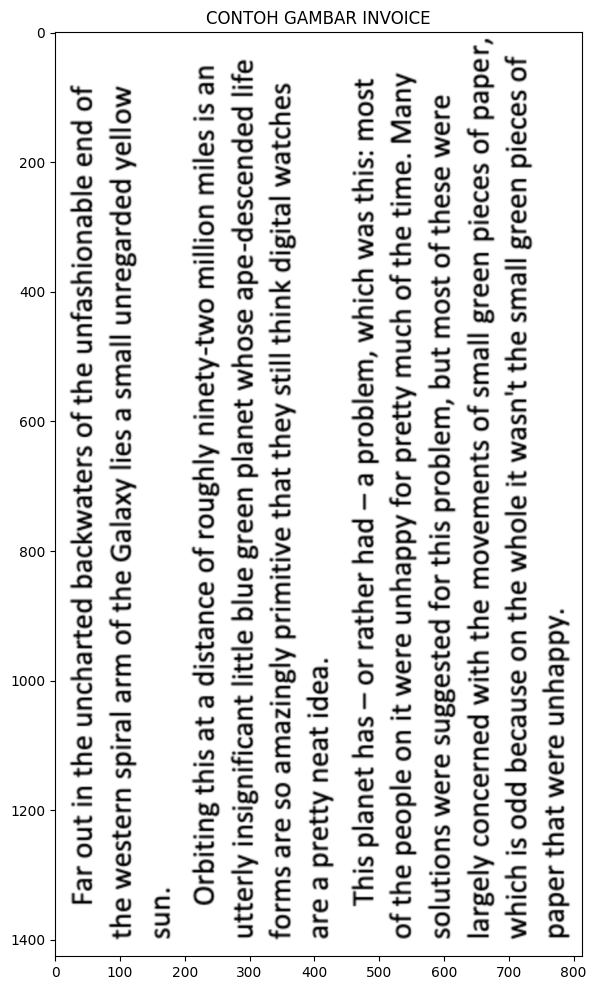

In [4]:
# Gambar Original

# Membaca gambar dari direktori
image = cv.imread(pathImg)

# memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b,g,r  = cv.split(image)
rgb_image = cv.merge([r,g,b])

# menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16,12))
plt.imshow(rgb_image)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

### Text Orientation and Script

In [6]:
# convert gambar dari BGR ke RGB
rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# menggunakan tesseract untuk melakukan orientasi text
results = pytesseract.image_to_osd(rgb, output_type=Output.DICT)

In [15]:
# menampilkan informasi orientasi (sebelum dilakukan rotasi untuk gambar yang benar)
print("[INFO] detected orientation: {}".format(results['orientation']))
print("[INFO] rotate by {} degrees to correct".format(results['rotate']))
print("[INFO] detected script: {}".format(results['script']))

[INFO] detected orientation: 270
[INFO] rotate by 90 degrees to correct
[INFO] detected script: Latin


In [16]:
# membaca tulisan yang ada pada gambar sebelum rotasi yang benar
print(pytesseract.image_to_string(image))

‘Addeyun asam jeu} Jaded

jo sadaid uae8 |jeWS Jy} },USeM }! BJOYM Uy} UO asnedaq ppo Ss! YDIUM

‘1aded jo sadaid uaai3 |jelWs JO SJUBLUAAOW 94} YIM pausaoUOD Ajazie|

3JIM BSU} JO JSOW Ng ‘Wajqod siy} JO} pajsadsns a1aM suO!yNjOs

Aue ‘awi} ay} Jo YOnwW Ayasd 10} Addeyun asam 3 UO ajdoad ay} Jo
JSOW :SIy} SEM YDIYM ‘Wajqoid e — pey Jayjes JO — sey Jaueld siyy

“eap! yeau Ajjaud e aue

SAYIIEM [eUSIP YUIY} []19S Ady. JEU} SAIZILULId AjsulZeWe Os ase SWIOJ

a}1| Papusdsap-ade ssoUM JoueR|d UBeI3 an|g aj}qI] JUeDIJIUSISU! AjJa}4N
ue SI Saji UOI||IWW OMj-AjauIU A]YBNOJ JO adUejSIP e Je SIY} BUIZIGIO

‘uns

MO}||aA papsesaiun |jews e salj Axejed ay} JO Wie jesIds Ua}saM au}
JO pua ajqeuolysejun ay} JO SsajzeMyIeG PayeyouN au} ul yNo Je



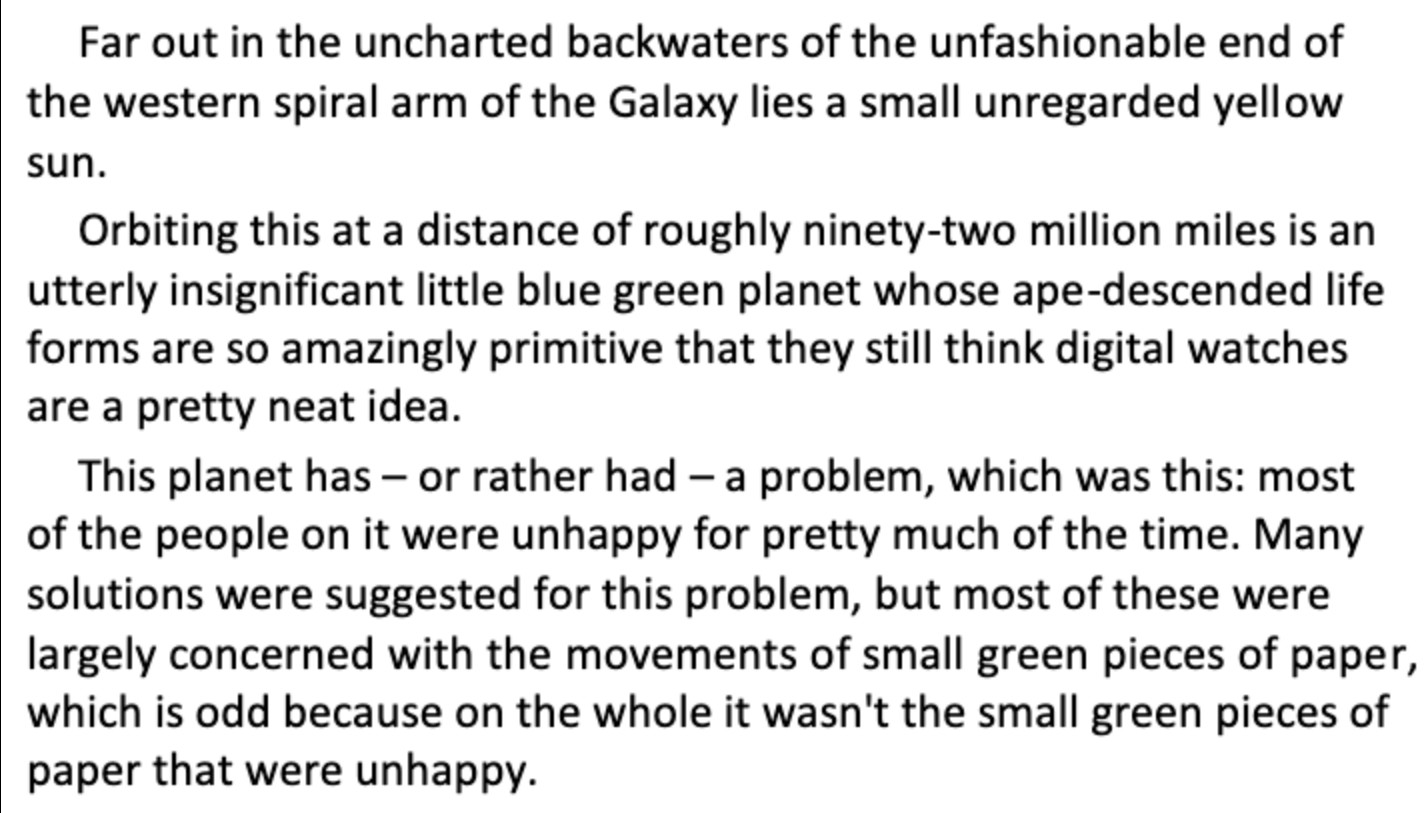

In [12]:
# melakukan rotasi gambar sesuai dengan informasi yang didapatkan
rotated = imutils.rotate_bound(image, angle=results['rotate'])

# menampilkan gambar yang sudah dirotasikan dengan benar
show(rotated)

In [17]:
# membaca tulisan yang ada pada gambar sesudah rotasi yang benar
print(pytesseract.image_to_string(rotated))

 

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

